In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from PIL import Image, ImageOps, ImageFilter

# import imutils
# import itertools
# import shutil
# import random
# import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Processing Covid19 Patients ECG images**

In [ ]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv2.LUT(src, table)

In [ ]:
pwd

'/content'

In [ ]:
# main_path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data1"

main_path = '/content/drive/My Drive/Lab_project/data/raw_data'

for foldername in os.listdir(main_path): # looping over the different class folder

    
  folder = main_path+"/"+foldername
  Copy_to_path = folder+"/processed/"

  print(folder)
  print(Copy_to_path)
  print("------------------------------")

  if foldername != "arrhythmia":
  
    for index, filename in enumerate(os.listdir(folder)): # retrieving the image files in particular folder
    
      if filename != 'processed':
          
          image = cv2.imread(folder+"/"+filename, cv2.IMREAD_GRAYSCALE) # grayscale

          enhance = cv2.equalizeHist(image) # equalize histogram used to enchance the lines

          thrsh = cv2.adaptiveThreshold(enhance,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,41,21) 

          contrs, _ = cv2.findContours(thrsh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # using threshold to get the contours
          contrs = list(contrs)

          c = max(contrs, key = cv2.contourArea) # getting the largest contours that is the largest shape ( image boundary )
          
          if c.shape[0] <= 4:            

              contrs.remove(max(contrs, key = cv2.contourArea)) # removing the frame

              c = max(contrs, key = cv2.contourArea) # again getting the largest frame that is the pulse frame

              x,y,w,h = cv2.boundingRect(c) # getting the co-ordinates


              rect = image[y:y+h, x:x+w] # cropping the frame

              cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),10) # drawing rectangle with the co-ordinates

              gamma_corrected = gammaCorrection(rect,3) # gamma correction

              (thresh, im_bw) = cv2.threshold(gamma_corrected, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # threshold is increased

              im_bw_resize = cv2.resize(im_bw,(720, 576)) # resizing the image to 256

              img = Image.fromarray(im_bw_resize)

              print(filename, " ", index)
              
              img.save(Copy_to_path+f'{foldername}_{index}.jpg', 'JPEG')
      else:
          pass






# **Data Augmentation**


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, img_to_array

In [ ]:
main_path = "/content/drive/My Drive/Lab_project/data/raw_data"
augmented_path = "/content/drive/My Drive/Lab_project/data/augmented"

data_gen_args = dict(
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     fill_mode='constant',
                     cval=255
                    )
image_datagen = ImageDataGenerator(**data_gen_args)

for foldername in os.listdir(main_path): # looping over the different class folder
    if foldername == 'arrhythmia': # #augmented
        
        folder = main_path+"/"+foldername+"/processed"

        Copy_to_path = augmented_path+'/'+foldername+'/'
        print(Copy_to_path)

    #     determining the files count in each category
    #     we want 7500 images in final dataset
    #     we have five categories
    #     so we need 1500 images in each category
        files_count = os.listdir(folder) 
        print(len(files_count))

        total_image_present = len(files_count)
        img_batch_size = round(2000/total_image_present)
        if img_batch_size > 8 :
            img_batch_size = 8

        print(f"batch size for {foldername} category is {img_batch_size}")
        file_count = 0
        for filename in os.listdir(folder): # retrieving the image files in particular folder

            img = Image.open(folder+"/"+filename)
            rgb_im = img.convert('RGB')
            print(folder+"/"+filename)
            file_count += 1
            #PIL images into NumPy arrays
            array = img_to_array(rgb_im)
            reshaped_np_arr = array.reshape((1,)+array.shape)
            count = 0

    #             generating the augmentation of images
            for batch in image_datagen.flow(
                reshaped_np_arr,
                batch_size=1,
                save_to_dir=Copy_to_path,
                save_prefix = foldername+f'{file_count}',
                save_format='jpeg',
                seed=20
            ):

                count += 1
                if count == img_batch_size:
                    break
                    
                            
    else:
        pass

/content/drive/My Drive/Lab_project/data/augmented/arrhythmia/
453
batch size for arrhythmia category is 4
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot146.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot126.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot121.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot114.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot120.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot12.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot119.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot118.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot116.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/processed/plot117.png
/content/drive/My Drive/Lab_project/data/raw_data/arrhythmia/pro

# **Test Train Split of all classes**

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
pwd

'/content'

In [ ]:
augmented_folder = "/content/drive/My Drive/Lab_project/data/augmented"
output_folder = "/content/drive/My Drive/Lab_project/data/inputs"

In [ ]:
# splitfolders.ratio(augmented_folder, output=output_folder,
#     seed=28, ratio=(.75, .25), group_prefix=None, move=False)

splitfolders.ratio('/content/drive/My Drive/Lab_project/data/augmented', 
                   output="/content/drive/My Drive/Lab_project/data/inputs", seed=10, ratio=(.8, 0.2)) 

Copying files: 9840 files [01:16, 129.32 files/s]


# **Reading the Test and Val images**

In [ ]:
import tensorflow as tf

In [ ]:
#Mounting google drive to read, write data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install tensorflow-gpu

##### Reading Training Data using keras

In [ ]:
train_folder = "/content/drive/My Drive/Lab_project/data/inputs/train"

In [ ]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_folder, 
    labels='inferred', 
    label_mode='int',
    # color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False, seed=11,
    validation_split=None,
    subset=None,
    follow_links=False
)

Found 7380 files belonging to 6 classes.


In [ ]:
training_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
import numpy as np


for images, labels in training_ds.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [ ]:

numpy_images_conv = np.array()
for i in numpy_images:
  numpy_images_conv[i] = np.ex

numpy_images.shape

(32, 224, 224, 1)

In [ ]:
images, labels = tuple(zip(*training_ds))

In [ ]:
labels

##### Reading Test/val Data using keras

In [ ]:
val_folder = "/content/drive/My Drive/Lab_project/data/inputs/val"


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_folder, 
    labels='inferred', 
    label_mode='int',
    # color_mode='grayscale',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False, seed=11,
    validation_split=None,
    subset=None,
    follow_links=False
)

Found 2460 files belonging to 6 classes.


In [ ]:
from keras.layers import *

In [ ]:
from keras.layers import Dense, Convolution2D, Flatten, Dropout,MaxPooling2D,Conv2D,MaxPool2D
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

# **Model Creation and training**

## Tuned and Stable Model

## **Model -1 - Main model**

---

In [ ]:
from keras.layers import Dense, Convolution2D, Flatten, Dropout,MaxPooling2D,Conv2D,MaxPool2D
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(6, activation="softmax"))

model.summary()


opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(training_ds,
          validation_data=val_ds,
          epochs=300,
          verbose=1
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
os.chdir("/content/drive/My Drive/Lab_project/data")

In [ ]:
model.save('eccg_model.h5')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/second sem'

In [ ]:
model.save_weights('ecg_model_weights.h5')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

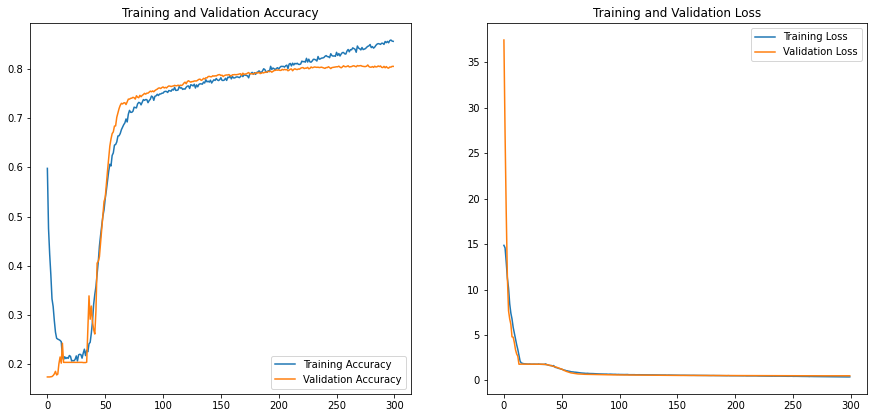

In [ ]:
epochs_range = range(300)

fig = plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
fig.tight_layout()
fig.savefig("chart.png",dpi=fig.dpi)


## **Model -2 - VGG model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten, Dropout,MaxPooling2D,Conv2D,MaxPool2D
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers[:15]:
  print(layer.name) 
  layer.trainable = False

x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(6, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

transfer_model.summary()


# opt = Adam(lr=0.001)
# transfer_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# callbacks = [EarlyStopping(monitor='val_loss', patience=5,verbose=1),
#             ModelCheckpoint(filepath='vgg_ecg.h5', monitor='val_loss', save_best_only=True)]




58900480/58889256 [==============================] - 0s 0us/step
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
        

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers


history = transfer_model.fit(training_ds, epochs=50,callbacks=callbacks,validation_data=val_ds)



Epoch 1/50
231/231 [==============================] - 360s 2s/step - loss: 13963.4355 - accuracy: 0.9289 - val_loss: 524375.6875 - val_accuracy: 0.1736
Epoch 2/50
231/231 [==============================] - 346s 2s/step - loss: 4969.0996 - accuracy: 0.8264 - val_loss: 140.3166 - val_accuracy: 0.1736
Epoch 3/50
231/231 [==============================] - 352s 2s/step - loss: 7.9210 - accuracy: 0.8222 - val_loss: 22.9384 - val_accuracy: 0.1736
Epoch 4/50
231/231 [==============================] - 352s 2s/step - loss: 2.4103 - accuracy: 0.6336 - val_loss: 2.4863 - val_accuracy: 0.1821
Epoch 5/50
231/231 [==============================] - 351s 2s/step - loss: 3.7074 - accuracy: 0.5446 - val_loss: 3.4598 - val_accuracy: 0.1748
Epoch 6/50
231/231 [==============================] - 349s 2s/step - loss: 4.8387 - accuracy: 0.5272 - val_loss: 10.5787 - val_accuracy: 0.1833
Epoch 7/50
231/231 [==============================] - 347s 2s/step - loss: 2.3506 - accuracy: 0.6237 - val_loss: 2.1534 - val_

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

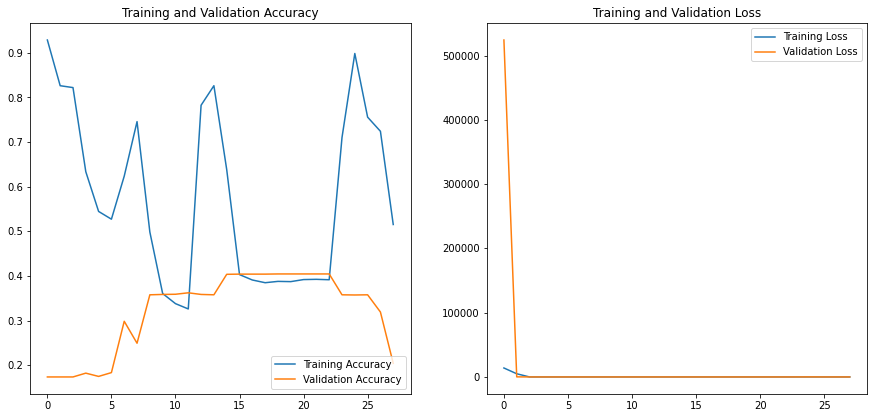

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(28)

fig = plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
fig.tight_layout()
fig.savefig("chart.png",dpi=fig.dpi)

# **Initial Model Builds**

## **Model - 3**

---

In [ ]:
def network(training_ds,val_ds):
  
  im_shape=(224,224,1)
  inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
  conv1_1=Conv2D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
  conv1_1=BatchNormalization()(conv1_1)
  pool1=MaxPooling2D(pool_size=(3), strides=(2), padding="same")(conv1_1)

  conv2_1=Conv2D(64, (3), activation='relu')(pool1)
  conv2_1=BatchNormalization()(conv2_1)
  pool2=MaxPooling2D(pool_size=(2), strides=(2), padding="same")(conv2_1)

  conv3_1=Conv2D(64, (3), activation='relu')(pool2)
  conv3_1=BatchNormalization()(conv3_1)
  pool3=MaxPooling2D(pool_size=(2), strides=(2), padding="same")(conv3_1)

  flatten=Flatten()(pool3)
  dense_end1 = Dense(64, activation='relu')(flatten)
  dense_end2 = Dense(32, activation='relu')(dense_end1)
  main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)


  model = Model(inputs= inputs_cnn, outputs=main_output)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])


  callbacks = [EarlyStopping(monitor='val_loss', patience=8),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]



  history=model.fit(training_ds, epochs=40,callbacks=callbacks, batch_size=32,validation_data=val_ds)
  model.load_weights('best_model.h5')
  return(model,history)
    

In [ ]:
model,history=network(training_ds=training_ds,val_ds=val_ds)

Epoch 1/40
189/189 [==============================] - 182s 962ms/step - loss: 5.9343 - accuracy: 0.8989 - val_loss: 135.8397 - val_accuracy: 0.0717
Epoch 2/40
189/189 [==============================] - 183s 967ms/step - loss: 5.7183 - accuracy: 0.8591 - val_loss: 1341.6213 - val_accuracy: 0.1389
Epoch 3/40
189/189 [==============================] - 181s 956ms/step - loss: 4.4294 - accuracy: 0.7498 - val_loss: 3.5840 - val_accuracy: 0.2136
Epoch 4/40
189/189 [==============================] - 186s 985ms/step - loss: 1.7333 - accuracy: 0.6964 - val_loss: 2.7176 - val_accuracy: 0.2719
Epoch 5/40
189/189 [==============================] - 215s 1s/step - loss: 1.8847 - accuracy: 0.6029 - val_loss: 2.4472 - val_accuracy: 0.2136
Epoch 6/40
189/189 [==============================] - 202s 1s/step - loss: 1.3482 - accuracy: 0.3103 - val_loss: 1.4473 - val_accuracy: 0.3695
Epoch 7/40
189/189 [==============================] - 182s 961ms/step - loss: 1.1862 - accuracy: 0.4314 - val_loss: 1.2449 - 

## **Model - 4** 

---

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))
cnn3.add(BatchNormalization())

cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(2, 2), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(5, activation='softmax'))

cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
cnn3.fit(training_ds,
         validation_data=val_ds,
         batch_size=32,
         epochs=11,
         verbose='auto',
)

Epoch 1/11
189/189 [==============================] - 97s 513ms/step - loss: 59.4232 - accuracy: 0.4864 - val_loss: 1.6233 - val_accuracy: 0.1982
Epoch 2/11
189/189 [==============================] - 97s 514ms/step - loss: 1.5517 - accuracy: 0.2346 - val_loss: 1.5805 - val_accuracy: 0.2321
Epoch 3/11
189/189 [==============================] - 97s 513ms/step - loss: 1.3650 - accuracy: 0.3571 - val_loss: 1.4438 - val_accuracy: 0.3167
Epoch 4/11
189/189 [==============================] - 97s 515ms/step - loss: 1.2519 - accuracy: 0.4290 - val_loss: 1.4320 - val_accuracy: 0.2829
Epoch 5/11
189/189 [==============================] - 98s 518ms/step - loss: 4.9769 - accuracy: 0.6262 - val_loss: 1.6290 - val_accuracy: 0.2126
Epoch 6/11
189/189 [==============================] - 98s 517ms/step - loss: 3.2352 - accuracy: 0.7382 - val_loss: 1.9433 - val_accuracy: 0.3884
Epoch 7/11
189/189 [==============================] - 97s 513ms/step - loss: 1.1552 - accuracy: 0.5405 - val_loss: 3.4759 - val_a

# Testing and Junkies

### Do Not Run These unless testing something

In [ ]:
augmented_path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data1\\augmented"
        

for foldername in os.listdir(augmented_path): # retrieving the image files in the particular folder
    
    folder = augmented_path+"\\"+foldername
    copy_path = augmented_path+'\\'+foldername+'\\cropped\\'
    print(copy_path)
    count = 0
    
    for filename in os.listdir(folder):
    
        if filename != 'cropped':
            count += 1
            image = cv2.imread(folder+"\\"+filename) #reading the images
            imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #converting the image to grayscale
            
            ret, thresh = cv2.threshold(imgray, 0, 1, 0) #finding image threshold
            contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # finding all the contours using chain approx none, chain_approx_simple creating many no of contours
            
            contour_max = max(contours, key = cv2.contourArea) # finding the highest contour for cropping the image
            
            x,y,w,h = cv2.boundingRect(contour_max) # getting the co-ordinates
            image = image[y:y+h, x:x+w] # cropping the frame
            cv2.imwrite(copy_path + f'{foldername}_{count}.jpg', image)

        else:
            pass
        

C:\Users\anant\jupyterBooks\LectureNotebooks\2022W\AML_2404_LAB\data1\augmented\abnormalHR\cropped\
C:\Users\anant\jupyterBooks\LectureNotebooks\2022W\AML_2404_LAB\data1\augmented\covid19\cropped\


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import cv2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array

## Testing Augmenting image code

In [ ]:
path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data\\test"
os.chdir(path)
print(os.listdir(os.curdir))
filename = "abnormalHR_14"

img_batch_size = 8

data_gen_args = dict(
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                     fill_mode='constant',
                     cval=255
                    )
image_datagen = ImageDataGenerator(**data_gen_args)


img = cv2.imread("abnormalHR_14.jpg")


reshaped_np_arr = img.reshape((1,)+img.shape)
count = 0

#             generating the augmentation of images
for batch in image_datagen.flow(
    reshaped_np_arr,
    batch_size=1,
    save_to_dir=os.curdir,
    save_prefix = filename,
    save_format='jpeg',
    seed=20
):

    count += 1
    if count == img_batch_size:
        break

['abnormalHR_0.jpg_0_840.jpeg', 'abnormalHR_0_cropped.jpeg.jpg', 'abnormalHR_124_cropped.jpeg.jpg', 'abnormalHR_14.jpg', 'abnormalHR_24.jpg_0_9181.jpeg', 'Screenshot 2022-03-28 222642.jpg']


In [ ]:
path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data\\test"
os.chdir(path)
print(os.listdir(os.curdir))
img = cv2.imread('abnormalHR_0.jpg_0_840.jpeg')

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 0, 1, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(type(contours))
print(len(contours))

if len(contours) != 0:
        
    c = max(contours, key = cv2.contourArea)
    contour_image = cv2.drawContours(img, contours, -1, (255,0,0), 3)
    cv2.imshow("out", contour_image)
    cv2.waitKey(0)
    x,y,w,h = cv2.boundingRect(c)
        
    rect = contour_image[y:y+h, x:x+w]
    cv2.imshow("out", rect)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

['abnormalHR_0.jpg_0_840.jpeg']
<class 'tuple'>
2


In [ ]:
path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data\\test"
os.chdir(path)
print(os.listdir(os.curdir))
filename = "abnormalHR_124_cropped.jpeg"
image = cv2.imread("abnormalHR_24.jpg_0_9181.jpeg") #reading the images

imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #converting the image to grayscale
ret, thresh = cv2.threshold(imgray, 0, 1, 0) #finding image threshold
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# finding all the contours using chain approx none, chain_approx_simple creating many no of contours
print(hierarchy)
print(len(contours))

contour_max = max(contours, key = cv2.contourArea) # finding the highest contour for cropping the image

x,y,w,h = cv2.boundingRect(contour_max) # getting the co-ordinates

image = image[y:y+h, x:x+w] # cropping the frame
cv2.imwrite(f'{filename}.jpg', image)

['abnormalHR_0.jpg_0_840.jpeg', 'abnormalHR_0_cropped.jpeg.jpg', 'abnormalHR_124_cropped.jpeg.jpg', 'abnormalHR_24.jpg_0_9181.jpeg', 'Screenshot 2022-03-28 222642.jpg']
[[[ -1  -1   1  -1]
  [  2  -1  -1   0]
  [  3   1  -1   0]
  ...
  [358 356  -1   0]
  [359 357  -1   0]
  [ -1 358  -1   0]]]
360


True

In [ ]:
path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data\\test"
os.chdir(path)
print(os.listdir(os.curdir))
img = cv2.imread('abnormalHR_0.jpg_0_840.jpeg', cv2.IMREAD_GRAYSCALE)

# contours, _ = cv2.findContours(...) # Your call to find the contours using OpenCV 2.4.x
blur = cv2.GaussianBlur(img,(5,5),0)
ret, threshold = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contrs, _ = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # using threshold to get the contours

contrs_list = list(contrs)
contrs_list.remove(max(contrs_list, key = cv2.contourArea)) # removing the frame
# again getting the largest frame that is the pulse frame

c = max(contrs_list, key = cv2.contourArea)


x,y,w,h = cv2.boundingRect(c) # getting the co-ordinates


rect = img[y:y+h, x:x+w] # cropping the frame

#                 cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),10) # drawing rectangle with the co-ordinates

#                 gamma_corrected = gammaCorrection(rect,3) # gamma correction

#                 (thresh, im_bw) = cv2.threshold(gamma_corrected, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # threshold is increased

#                 im_bw_resize = cv2.resize(im_bw,(720, 576)) # resizing the image to 256
# img = Image.fromarray(rect)


cv2.imshow('image',rect)
# cv2.drawContours(img, contrs, 3, (0,255,0), 3)
cv2.waitKey(0)
cv2.destroyAllWindows()

#thrsh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,41,21) 

# canny_output = cv2.Canny(img, thrsh, thrsh * 2)
# contours, _ = cv2.findContours(thrsh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # Your call to find the contours
# print(contours)

# # Draw contours
# drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
# for i in range(len(contours)):
#     color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#     cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
# # Show in a window
# cv.imshow('Contours', drawing)



['abnormalHR_0.jpg_0_840.jpeg']
<class 'numpy.ndarray'>
(101, 1, 2)


In [ ]:
idx = 2 # The index of the contour that surrounds your object
mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

# Show the output image
cv2.imshow('Output', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
path = "C:\\Users\\anant\\jupyterBooks\\LectureNotebooks\\2022W\\AML_2404_LAB\\data\\test"
os.chdir(path)
print(os.listdir(os.curdir))
img = cv2.imread('abnormalHR_0.jpg_0_840.jpeg') # Read in your image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 

kernel = np.ones((9,9), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# put mask into alpha channel of result
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
#cv2.imwrite('retina_masked.png', result)
cv2.imshow('Output', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

['abnormalHR_0.jpg_0_840.jpeg']


In [ ]:
# PATH = "data/covid19/"


# for filename in os.listdir(PATH):
#     img = Image.open(os.path.join(PATH, filename)) # images are color images
#     img = img.resize((1920,1080), Image.BICUBIC)
#     img.save(Copy_to_path+filename) 

In [ ]:

# filename = 'data/covid19/Binder1_Page_001.jpg'

# size = (720, 576)
# count = 0
# for filename in g
# with Image.open(filename) as im:
#     gray_img = ImageOps.grayscale(im)
#     gray_img.save('data/covid19/processed/covid001'+'.jpeg')

In [ ]:
# file_path = "data/covid19/Binder1_Page_017"
# Copy_to_path="data/covid19/processed/"

# count = 0

# for filename in glob.glob(f'{file_path}.jpg'):
#     count += 1
#     with Image.open(filename) as img:
#         img = img.convert('L')
#         img = img.filter(ImageFilter.SHARPEN)
#         img = img.filter(ImageFilter.EDGE_ENHANCE)
        
#         #img = img.filter(ImageFilter.CONTOUR)    
#         #img = img.filter(ImageFilter.EMBOSS)
#         #img = img.filter(ImageFilter.EDGE_ENHANCE)
#         image = np.array(img) # converting PIL image to numpy array
        
#         thrsh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41, 21) 

#         contrs, _ = cv2.findContours(thrsh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # using threshold to get the contours
#         contrs = list(contrs)
        
#         c = max(contrs, key = cv2.contourArea)
        
#         contrs.remove(max(contrs, key = cv2.contourArea)) # removing the frame

#         c = max(contrs, key = cv2.contourArea) # again getting the largest frame that is the pulse frame

#         x,y,w,h = cv2.boundingRect(c) # getting the co-ordinates


#         rect = image[y:y+h, x:x+w] # cropping the frame

#         cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),10) # drawing rectangle with the co-ordinates

#         gamma_corrected = gammaCorrection(rect,3) # gamma correction

#         (thresh, im_bw) = cv2.threshold(gamma_corrected, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # threshold is increased
        
#         print(type(im_bw))
#         processed_img = Image.fromarray(im_bw) #Converting the array to image
#         processed_img.show()
#         processed_img.save(Copy_to_path+f'/covid19_{count}.jpg', 'JPEG') 
